# 1. Library Import and Initial Setup
This section imports all necessary libraries such as pandas, matplotlib, seaborn, etc., which are required for data manipulation, visualization, and modeling. These libraries provide the foundational tools needed for data processing and visualization. Without them, analysis and modeling wouldn't be possible.

In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 2. Data Loading and Inspection
This part reads the dataset into memory (most likely using pd.read_csv or similar) and performs an initial inspection using .head(), .info(), or .describe(). To understand the structure, types, and quality of data. It helps in planning the cleaning and transformation stages.

In [314]:
df = pd.read_csv("../data/Jewelry_Dataset.csv")
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [328]:
columns = [
    'Order datetime', 'Order ID', 'Purchased product ID', 'Quantity of SKU in the order',
    'Category ID', 'Category alias', 'Brand ID', 'Price in USD', 'User ID',
    'Product gender', 'Main Color', 'Main metal', 'Main gem'
]


In [330]:
df = pd.read_csv("../data/Jewelry_Dataset.csv", header=None, names=columns)
df.head(n=5)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst


In [331]:
# Check the column names
print(df.columns)


Index(['Order datetime', 'Order ID', 'Purchased product ID',
       'Quantity of SKU in the order', 'Category ID', 'Category alias',
       'Brand ID', 'Price in USD', 'User ID', 'Product gender', 'Main Color',
       'Main metal', 'Main gem'],
      dtype='object')


In [332]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the column names again to ensure there are no spaces
print(df.columns)


Index(['Order datetime', 'Order ID', 'Purchased product ID',
       'Quantity of SKU in the order', 'Category ID', 'Category alias',
       'Brand ID', 'Price in USD', 'User ID', 'Product gender', 'Main Color',
       'Main metal', 'Main gem'],
      dtype='object')


In [333]:
# Check for missing values
print(df.isnull().sum())

Order datetime                      0
Order ID                            0
Purchased product ID                0
Quantity of SKU in the order        0
Category ID                      5352
Category alias                   9933
Brand ID                         4785
Price in USD                     5352
User ID                          5352
Product gender                  48168
Main Color                       7660
Main metal                       5462
Main gem                        34058
dtype: int64


In [334]:
df.shape

(95911, 13)

In [335]:
# Check for unique values-feature cardinalty
df.nunique()

Order datetime                  74505
Order ID                        74760
Purchased product ID             9613
Quantity of SKU in the order        1
Category ID                        25
Category alias                    218
Brand ID                         2537
Price in USD                     3166
User ID                         31079
Product gender                      2
Main Color                          5
Main metal                          3
Main gem                           30
dtype: int64

In [336]:
# Data description
df.describe()

,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Brand ID,Price in USD,User ID
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order datetime                95911 non-null  object 
 1   Order ID                      95911 non-null  int64  
 2   Purchased product ID          95911 non-null  int64  
 3   Quantity of SKU in the order  95911 non-null  int64  
 4   Category ID                   90559 non-null  float64
 5   Category alias                85978 non-null  object 
 6   Brand ID                      91126 non-null  float64
 7   Price in USD                  90559 non-null  float64
 8   User ID                       90559 non-null  float64
 9   Product gender                47743 non-null  object 
 10  Main Color                    88251 non-null  object 
 11  Main metal                    90449 non-null  object 
 12  Main gem                      61853 non-null  object 
dtypes

# 3. Data Preprocessing
For section, steps are carries out to preprocess the data. the steps involved are Dropping irrelevant columns (like Order ID, User ID, etc.), Handling missing or null values, Type conversion where needed. Cleaning ensures that the data is consistent and formatted correctly, enabling accurate analysis and modeling.

In [338]:
# check for duplicate values
num_duplicated = len(df.loc[df.duplicated()])


In [339]:
print(f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2589


In [340]:
# feature with cardinalty of 1(invariant feature)
invariant_features = df.nunique()[df.nunique() == 1].index.tolist()

In [341]:
invariant_features

['Quantity of SKU in the order']

In [342]:
# check for label distribution
df['Price in USD'].skew()

18.959088306248297

At the end of the data inspection and preprocessing. the following was notably observed, 

1. The dataset contains 13 columns, 95,911 rows.

2. There are Notable null values in:

  a. Category alias (13% missing),

  b. Product gender (50% missing),

  c. Main gem (35% missing),

3. Data types include: object, float64, and int64.

Interpretation of the observation above includes:

i. Some features have severe missingness (e.g. Product gender, Main gem) and would need imputation or exclusion.

ii. Order datetime, User ID, and Purchased product ID are likely identifiers and were later dropped in the analysis.

# 4. Exploratory Data analysis(EDA)
Here I perform EDA to understand the data and gain more insights. Actions taken here include Calculation of correlation using Spearman method, Visualization using a correlation heatmap, Identification of highly or moderately correlated features.

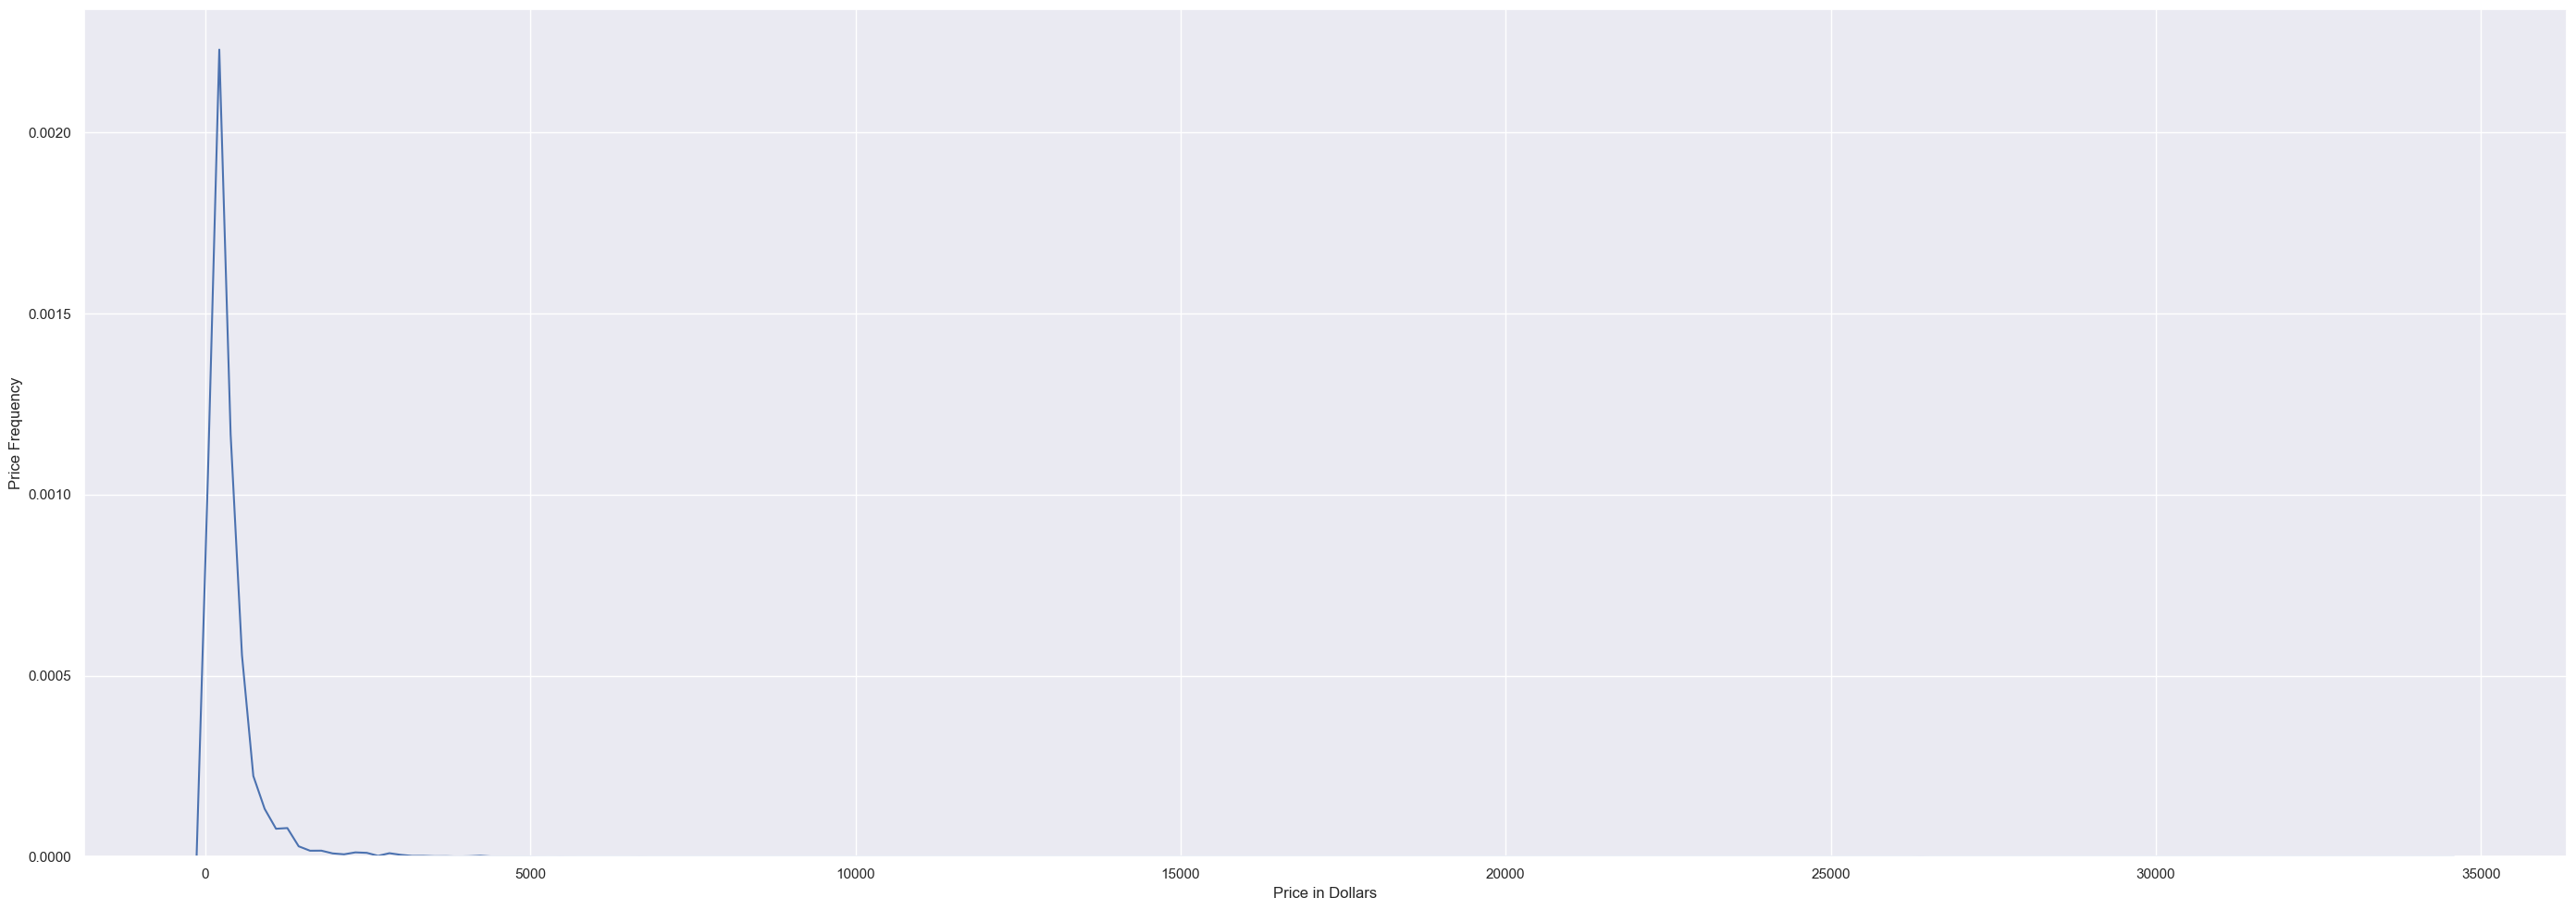

In [343]:
# Visualize Price Distribution
plt.figure(figsize = (28, 10))

sns.kdeplot(data=df, x= "Price in USD")

plt.xlabel('Price in Dollars')
plt.ylabel('Price Frequency')

plt.tight_layout()
plt.show(); plt.close()

In [345]:
# Price Kurtosis
df["Price in USD"].kurtosis()

1054.9045087611369

In [346]:
# Gender Analysis
df["Product gender"].value_counts()

f    47379
m      364
Name: Product gender, dtype: int64

In [347]:
# Gender Analysis
df["Product gender"].value_counts(normalize = True)

f    0.992376
m    0.007624
Name: Product gender, dtype: float64

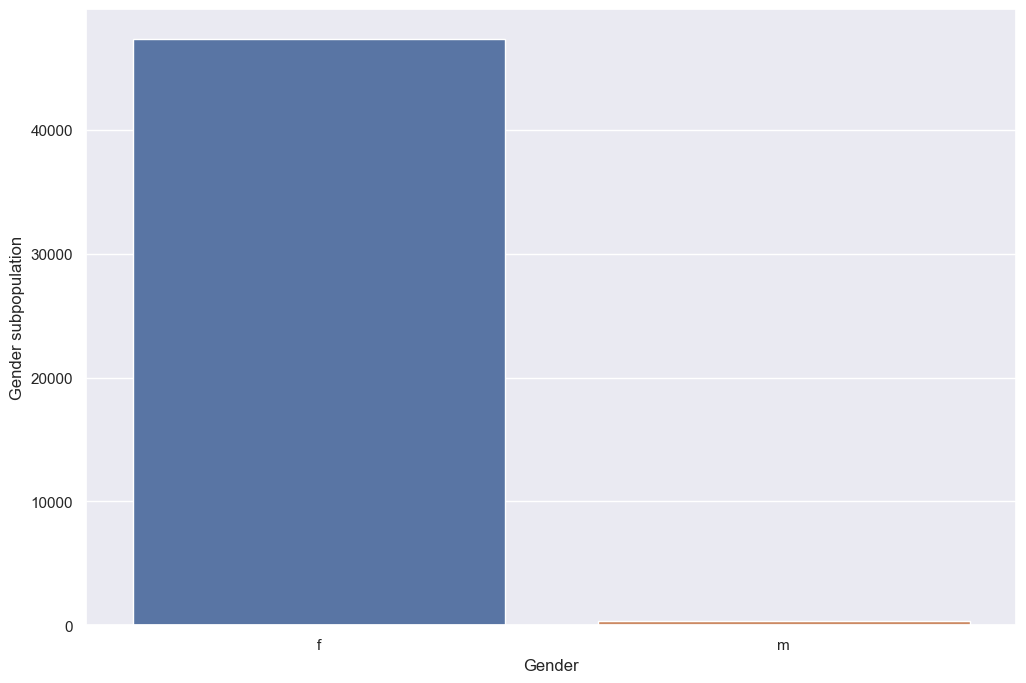

In [348]:
# visualize product gender
plt.figure(figsize = (12, 8))

sns.countplot(data=df, x= "Product gender")

plt.xlabel('Gender')
plt.ylabel('Gender subpopulation')

plt.show(); plt.close()

In [349]:
# Jewelry analysis
df["Category alias"].value_counts()

jewelry.earring     29052
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category alias, Length: 218, dtype: int64

In [350]:
df["Category alias"].unique()

array(['jewelry.earring', nan, 'jewelry.pendant', 'jewelry.necklace',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [351]:
# extract actual categories
categories = df['Category alias'].unique().tolist()

categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [352]:
categories

['jewelry.earring',
 'jewelry.pendant',
 'jewelry.necklace',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [353]:
# pick out authentic data based on categories
actual_categories = df.loc[df["Category alias"].isin(categories)]

In [354]:
# check percentage of missing values
100*df.isnull().sum()/len(df)

Order datetime                   0.000000
Order ID                         0.000000
Purchased product ID             0.000000
Quantity of SKU in the order     0.000000
Category ID                      5.580173
Category alias                  10.356476
Brand ID                         4.989000
Price in USD                     5.580173
User ID                          5.580173
Product gender                  50.221560
Main Color                       7.986571
Main metal                       5.694863
Main gem                        35.510004
dtype: float64

In [355]:
100*actual_categories.isnull().sum()/len(actual_categories)

Order datetime                   0.000000
Order ID                         0.000000
Purchased product ID             0.000000
Quantity of SKU in the order     0.000000
Category ID                      0.000000
Category alias                   0.000000
Brand ID                         4.309027
Price in USD                     0.000000
User ID                          0.000000
Product gender                  44.842715
Main Color                       2.656011
Main metal                       0.110615
Main gem                        24.232218
dtype: float64

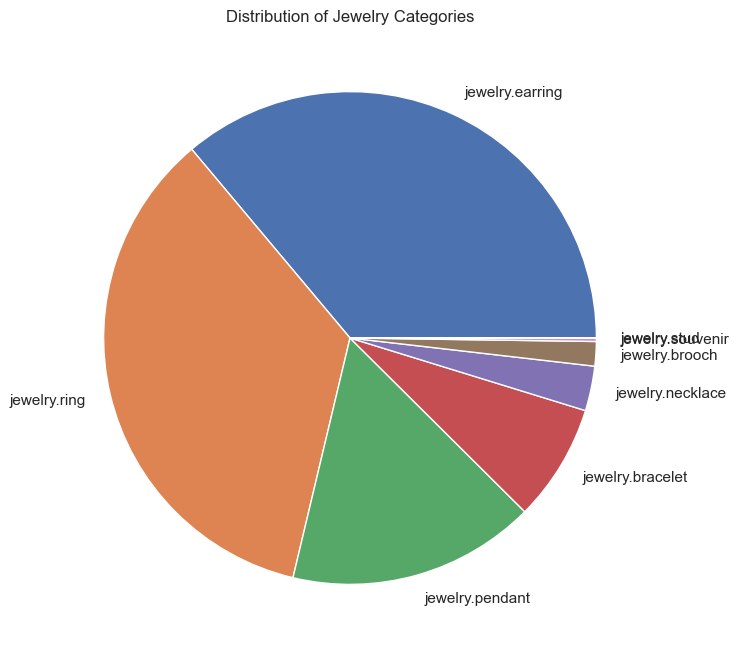

In [356]:
# visualize jewelry categories
subdata = actual_categories["Category alias"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(12,8))

plt.pie(x = counts,  labels = jewelry_categories)

#plt.bar(jewelry_categories, counts)  # Create a bar chart
plt.title('Distribution of Jewelry Categories')  # Title of the chart
#plt.xlabel('Jewelry Categories')  # X-axis label
#plt.ylabel('Count')  # Y-axis label
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
#plt.tight_layout()  # Adjust layout to fit labels
#plt.show()

plt.show(); plt.close()

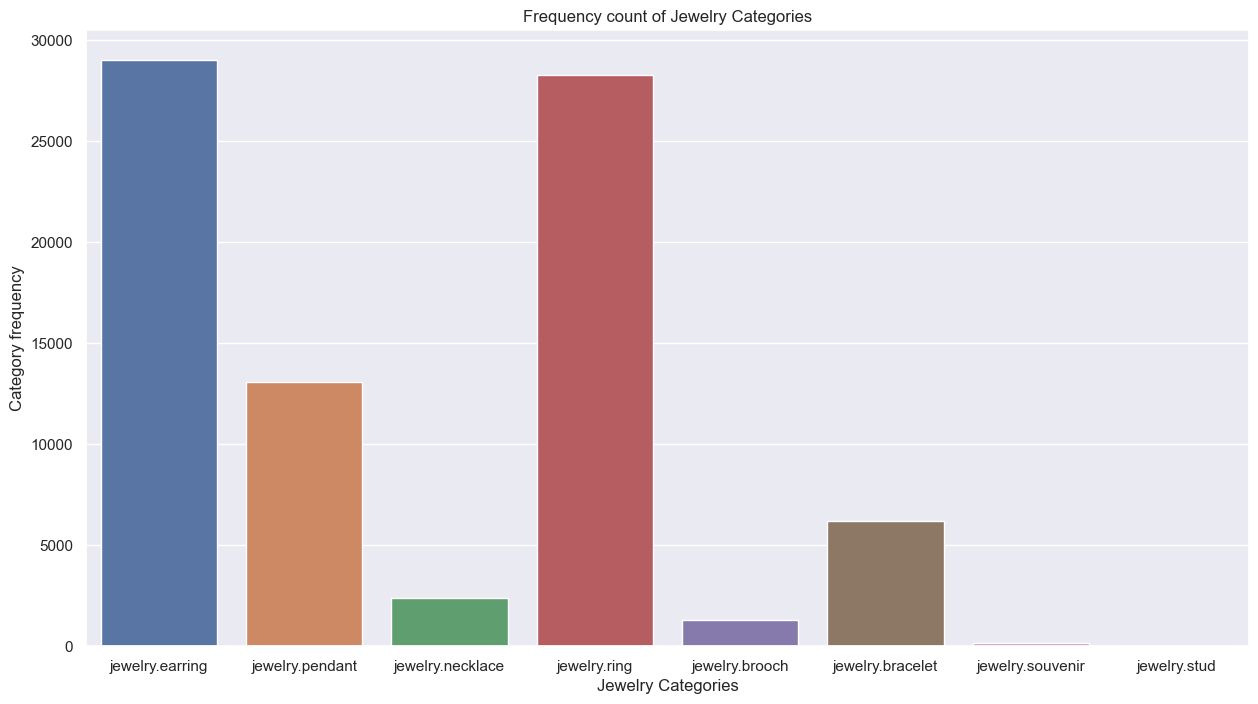

In [357]:
#category count plot
plt.figure(figsize=(15,8))

sns.countplot(data=actual_categories, x="Category alias")

plt.title('Frequency count of Jewelry Categories')
plt.xlabel('Jewelry Categories')  # X-axis label
plt.ylabel('Category frequency')

plt.show();plt.close()

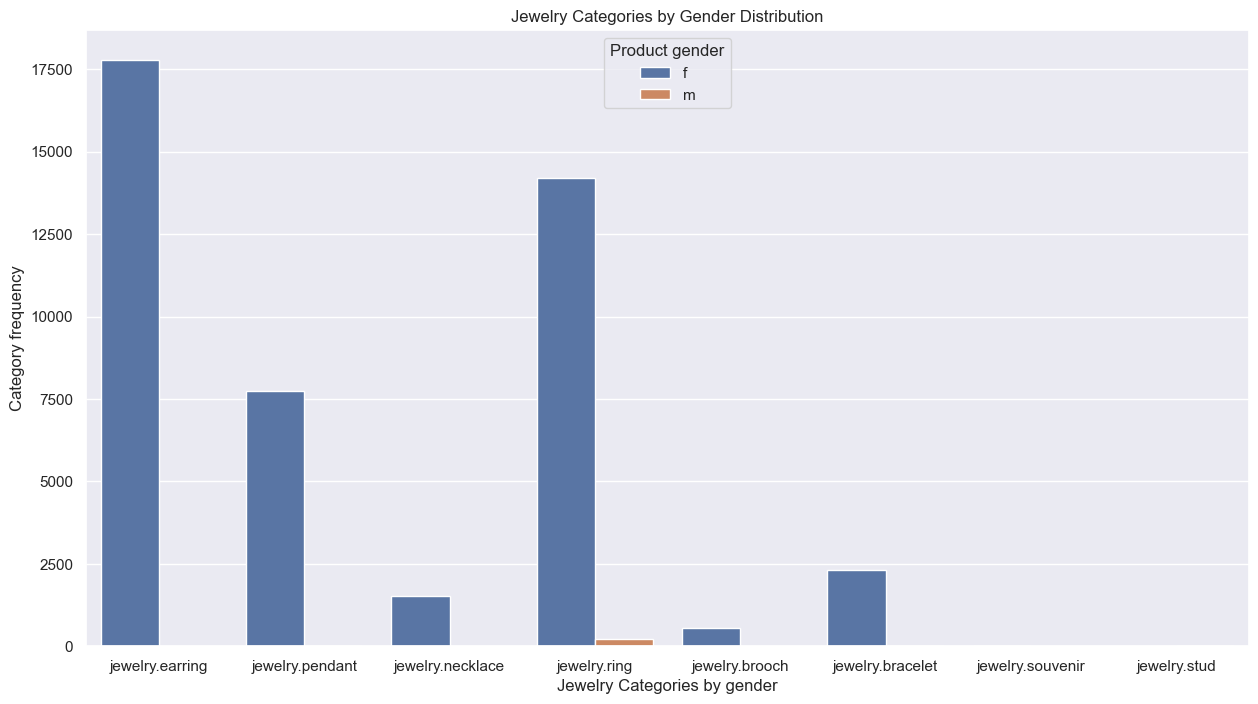

In [358]:
# Analyze jewelry category by gender
plt.figure(figsize =(15, 8))

sns.countplot(data=actual_categories, x="Category alias", hue ="Product gender")

plt.title('Jewelry Categories by Gender Distribution')  # Title of the chart
plt.xlabel('Jewelry Categories by gender')  # X-axis label
plt.ylabel('Category frequency')

plt.show();plt.close()

In [359]:
#Gender skew i original data
df["Product gender"].value_counts(normalize=True)

f    0.992376
m    0.007624
Name: Product gender, dtype: float64

In [360]:
actual_categories["Product gender"].value_counts(normalize=True)

f    0.994434
m    0.005566
Name: Product gender, dtype: float64

In [361]:
# Create a copy of the dataframe to avoid modifying the original DataFrame
actual_categories = actual_categories.copy()

# Now, you can safely modify 'Category alias'
actual_categories["Category alias"] = encoded


In [362]:
# Create a copy of the dataframe to avoid modifying the original DataFrame
actual_categories = actual_categories.copy()

# Now, you can safely modify 'Category alias'
actual_categories["Main Color"] = encoded


In [363]:
# Create a copy of the dataframe to avoid modifying the original DataFrame
actual_categories = actual_categories.copy()

# Now, you can safely modify 'Category alias'
actual_categories["Main gem"] = encoded


In [364]:
# Create a copy of the dataframe to avoid modifying the original DataFrame
actual_categories = actual_categories.copy()

# Now, you can safely modify 'Category alias'
actual_categories["Main metal"] = encoded


In [365]:
actual_categories.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,0,0.0,561.51,1.515916e+18,NaN,0,0,0
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,1,1.0,54.66,1.515916e+18,f,1,1,1
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,1,0.0,88.90,1.515916e+18,f,1,1,1
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,2,0.0,417.67,1.515916e+18,NaN,2,2,2
5,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,0,1.0,102.27,1.515916e+18,NaN,0,0,0


In [366]:
actual_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80459 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order datetime                80459 non-null  object 
 1   Order ID                      80459 non-null  int64  
 2   Purchased product ID          80459 non-null  int64  
 3   Quantity of SKU in the order  80459 non-null  int64  
 4   Category ID                   80459 non-null  float64
 5   Category alias                80459 non-null  int64  
 6   Brand ID                      76992 non-null  float64
 7   Price in USD                  80459 non-null  float64
 8   User ID                       80459 non-null  float64
 9   Product gender                44379 non-null  object 
 10  Main Color                    80459 non-null  int64  
 11  Main metal                    80459 non-null  int64  
 12  Main gem                      80459 non-null  int64  
dtypes

The table below shows notable key correlation results

| Feature Pair                     | Spearman Correlation |
| -------------------------------- | -------------------- |
| `Category ID` ↔ `Category alias` | **-0.63**            |
| `Category ID` ↔ `Main Color`     | **-0.63**            |
| `Category ID` ↔ `Main metal`     | **-0.63**            |
| `Category ID` ↔ `Main gem`       | **-0.63**            |
| `Category ID` ↔ `Brand ID`       | 0.11                 |
| `Category ID` ↔ `Product gender` | 0.11                 |
| `Brand ID` ↔ `Product gender`    | **0.62**             |
| `Price in USD` ↔ `Category ID`   | -0.29                |


The result above indicates the following

1. Very strong negative correlation (-0.63) between Category ID and multiple features (Main Color, Main metal, Main gem, Category alias) suggests categorical redundancy or reverse-ordinal patterns.

2. Moderate positive correlation (0.62) between Brand ID and Product gender implies brand-gender association patterns, valuable for marketing.


# 5. Feature Selection Based on Correlation
Here correlation is checked and then The code creates a dictionary correlated_columns to store features that are moderately correlated (fall between defined lower and upper bounds).This section is implemented to reduce to reduce dimensionality and avoid overfitting in machine learning models by eliminating redundant features.

In [367]:
# feature correlation
# Drop the columns "Order datetime", "Order ID", "Purchased product ID", and "User ID" and compute correlation
correlation = actual_categories.drop(["Order datetime", "Order ID", "Purchased product ID", "User ID"], axis=1).corr(method="spearman")

# Display the correlation matrix
print(correlation)



                              Quantity of SKU in the order  Category ID  \
Quantity of SKU in the order                           NaN          NaN   
Category ID                                            NaN     1.000000   
Category alias                                         NaN    -0.633629   
Brand ID                                               NaN     0.111322   
Price in USD                                           NaN    -0.296486   
Main Color                                             NaN    -0.633629   
Main metal                                             NaN    -0.633629   
Main gem                                               NaN    -0.633629   

                              Category alias  Brand ID  Price in USD  \
Quantity of SKU in the order             NaN       NaN           NaN   
Category ID                        -0.633629  0.111322     -0.296486   
Category alias                      1.000000 -0.056923      0.068435   
Brand ID                           -

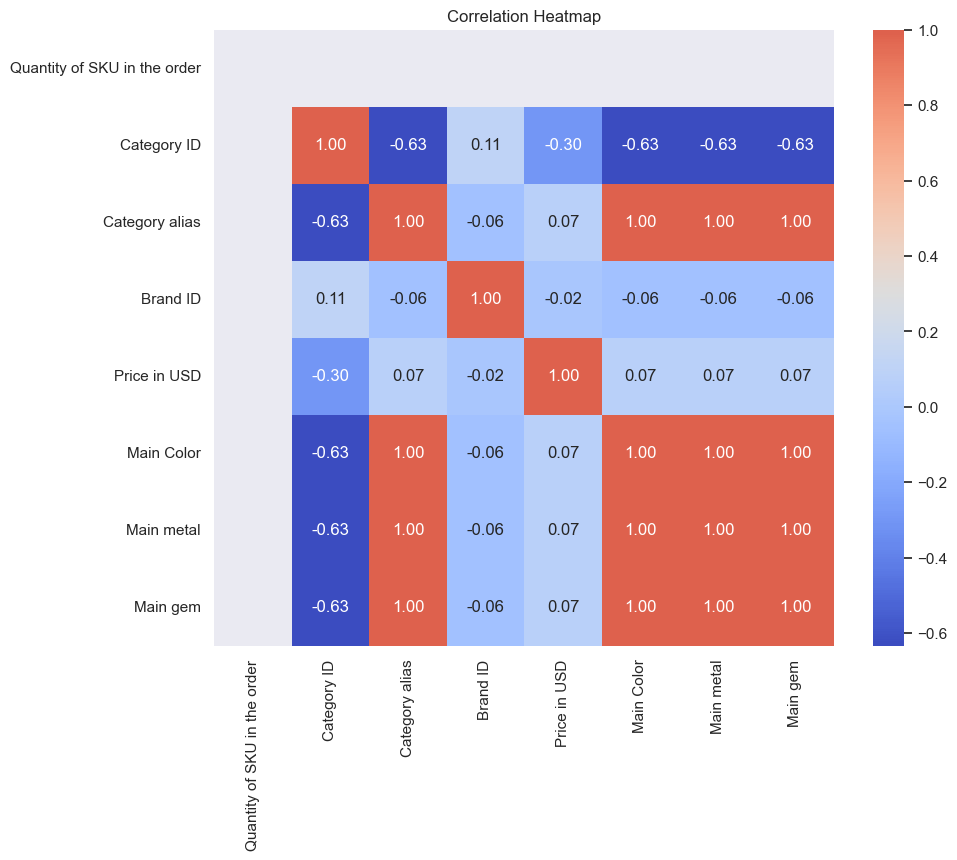

In [368]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, center =.3, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()
plt.close()

The heatmap above confirms the strong correlations and makes it visually apparent which variables are multicollinear.

In [369]:
#set correlation limit
upper =1
lower =.2

In [370]:
#explicitly get correlated features
correlated_columns = {
    column: correlation[(correlation[column] > lower) & (correlation[column] < upper)].index.tolist()
    for column in correlation.columns
}

In [371]:
correlated_columns

{'Quantity of SKU in the order': [],
 'Category ID': [],
 'Category alias': [],
 'Brand ID': [],
 'Price in USD': [],
 'Main Color': [],
 'Main metal': [],
 'Main gem': []}

INTERPRETATION

1. Features with correlation coefficients between 0.2 and 1.0 (excluding 1.0 itself) are stored for each variable.

2. Helps in building a dictionary of moderately-to-highly correlated features, potentially guiding:

   Feature selection,

   Dimensionality reduction (e.g. PCA),

   Domain-driven hypothesis testing.

# 6.  Quantitative Implications from EDA
The table below summarise the findings and Business implications

| Finding                                                   | Numerical Evidence                | Interpretation                                                                                                                     |
| --------------------------------------------------------- | --------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| `Brand ID` and `Product gender` are correlated            | 0.6237                            | Strong gender-brand association: useful in personalized advertising or gender-based product lines.                                 |
| Multiple features correlate with `Category ID` at \~-0.63 | Main gem, Main metal, Color, etc. | These are either redundant or driven by shared category metadata (e.g. "Gold Ring" might define both "Main metal" and "Category"). |
| Price has a slight negative correlation with Category ID  | -0.29                             | Suggests product types (categories) vary in pricing (e.g., rings might be cheaper than necklaces).                                 |
| Most correlations with quantity are **NaN**               | —                                 | Indicates constant or null variance for quantity across certain categories — should be investigated.                               |


# Data Preparation

## Eliminated Unwanted Features 
## Feature Encoding Using OneHotEncoder
# Fix Target Skew
# Handle missing Values

In [372]:
#Eliminate Unwanted/redundant Features
columns_to_drop = [
    'Quantity of SKU in the order',
    'Order ID',
    'Purchased product ID',
    'User ID',
    'Category ID'
]
df = df.drop(labels=columns_to_drop, axis=1)

print(df.shape)

(95911, 8)


In [373]:
df = df.drop(labels = ['Order datetime'], axis=1)

In [374]:
df.head()

,Category alias,Brand ID,Price in USD,Product gender,Main Color,Main metal,Main gem
0,jewelry.earring,0.0,561.51,NaN,red,gold,diamond
1,NaN,NaN,212.14,NaN,yellow,gold,NaN
2,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
3,jewelry.pendant,0.0,88.90,f,red,gold,diamond
4,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst


In [375]:
#Eliminate unrealistic categories"
df = df.loc[df['Category alias'].isin(categories), :]

In [376]:
df.shape

(80459, 7)

In [377]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split

# --- Assume df is your DataFrame with both features and target ---
# Example: target = 'Price in USD'
target = 'Price in USD'

# Select categorical columns for encoding
categorical_cols = ['Main gem', 'Main metal', 'Product gender']

# Identify numeric columns (excluding the target)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != target]

# Define preprocessing for numeric and categorical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, categorical_cols)
])


In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X, y =df.drop(labels=["Price in USD"], axis =1), df['Price in USD']

In [380]:
# create test and train split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size= .1)